<a href="https://www.kaggle.com/code/ciscoyslas/ciscoprojectnotebook?scriptVersionId=150304832" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# 1. Introduction/Background

_This data set is for craft beers.  It includes over 2400 beers, over 1400 breweries, and 15 parameters that describe the beer in general. Including, but not limited to, ABV (Alcohol by Volume), beer styles (i.e., lager, pale ale, etc.), and IBU (international bitterness units). This data will be used to predict what style of beers are in the data set.  The problem we will be solving is a multi-class classification problem._  

In [1]:
# import all of the python modules/packages you'll need here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/craft-beers/categories.csv
/kaggle/input/craft-beers/breweries_geocode.csv
/kaggle/input/craft-beers/breweries.csv
/kaggle/input/craft-beers/styles.csv
/kaggle/input/craft-beers/beers.csv


## 2. Exploratory Data Analysis

_You will now load the dataset and carry out some exploratory data analysis steps to better understand what text data looks like. See the examples from class on 10/. The following links provide some good resources of exploratory analyses of text data with Python._


* https://neptune.ai/blog/exploratory-data-analysis-natural-language-processing-tools
* https://regenerativetoday.com/exploratory-data-analysis-of-text-data-including-visualization-and-sentiment-analysis/
* https://medium.com/swlh/text-summarization-guide-exploratory-data-analysis-on-text-data-4e22ce2dd6ad  
* https://www.kdnuggets.com/2019/05/complete-exploratory-data-analysis-visualization-text-data.html  


In [2]:
beers_df = pd.read_csv('/kaggle/input/craft-beers/beers.csv')
breweries_df= pd.read_csv('/kaggle/input/craft-beers/breweries.csv')
breweries_geocode_df = pd.read_csv('/kaggle/input/craft-beers/breweries_geocode.csv')
categories_df= pd.read_csv('/kaggle/input/craft-beers/categories.csv')
styles_df = pd.read_csv('/kaggle/input/craft-beers/styles.csv')

In [3]:
beers_df.head()

,Unnamed: 0,count.x,abv,ibu,id,beer,style,brewery_id,ounces,style2,count.y,brewery,city,state,label
0,1,1,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0,NaN,409,10 Barrel Brewing Company,Bend,OR,Pub Beer (10 Barrel Brewing Company)
1,2,2,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0,American Pale Ale (APA),178,18th Street Brewery,Gary,IN,Devil's Cup (18th Street Brewery)
2,3,3,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0,American IPA,178,18th Street Brewery,Gary,IN,Rise of the Phoenix (18th Street Brewery)
3,4,4,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0,American Double / Imperial IPA,178,18th Street Brewery,Gary,IN,Sinister (18th Street Brewery)
4,5,5,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0,American IPA,178,18th Street Brewery,Gary,IN,Sex and Candy (18th Street Brewery)


In [4]:
breweries_df.head()

,id,name,address1,address2,city,state,code,country,phone,website,filepath,descript,last_mod
0,1,(512) Brewing Company,"407 Radam, F200",NaN,Austin,Texas,78745,United States,512.707.2337,http://512brewing.com/,NaN,(512) Brewing Company is a microbrewery locate...,2010-07-22 20:00:20
1,2,21st Amendment Brewery Cafe,563 Second Street,NaN,San Francisco,California,94107,United States,1-415-369-0900,http://www.21st-amendment.com/,NaN,The 21st Amendment Brewery offers a variety of...,2010-10-24 13:54:07
2,3,3 Fonteinen Brouwerij Ambachtelijke Geuzestekerij,Hoogstraat 2A,NaN,Beersel,Vlaams Brabant,NaN,Belgium,32-02-/-306-71-03,http://www.3fonteinen.be/index.htm,NaN,NaN,2010-07-22 20:00:20
3,4,Aass Brewery,Ole Steensgt. 10 Postboks 1530,NaN,Drammen,NaN,NaN,Norway,47-32-26-60-00,http://www.aass.no,NaN,Aass Brewery was established in 1834 and is th...,2010-07-22 20:00:20
4,5,Abbaye de Leffe,Dinant,NaN,Dinant,Namur,NaN,Belgium,NaN,NaN,NaN,NaN,2010-07-22 20:00:20


In [5]:
beers_df.shape



(2410, 15)

In [6]:
breweries_df.shape

(1414, 13)

In [7]:
beers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2410 entries, 0 to 2409
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2410 non-null   int64  
 1   count.x     2410 non-null   int64  
 2   abv         2348 non-null   float64
 3   ibu         1405 non-null   float64
 4   id          2410 non-null   int64  
 5   beer        2410 non-null   object 
 6   style       2405 non-null   object 
 7   brewery_id  2410 non-null   int64  
 8   ounces      2410 non-null   float64
 9   style2      1112 non-null   object 
 10  count.y     2410 non-null   int64  
 11  brewery     2410 non-null   object 
 12  city        2410 non-null   object 
 13  state       2410 non-null   object 
 14  label       2410 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 282.5+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

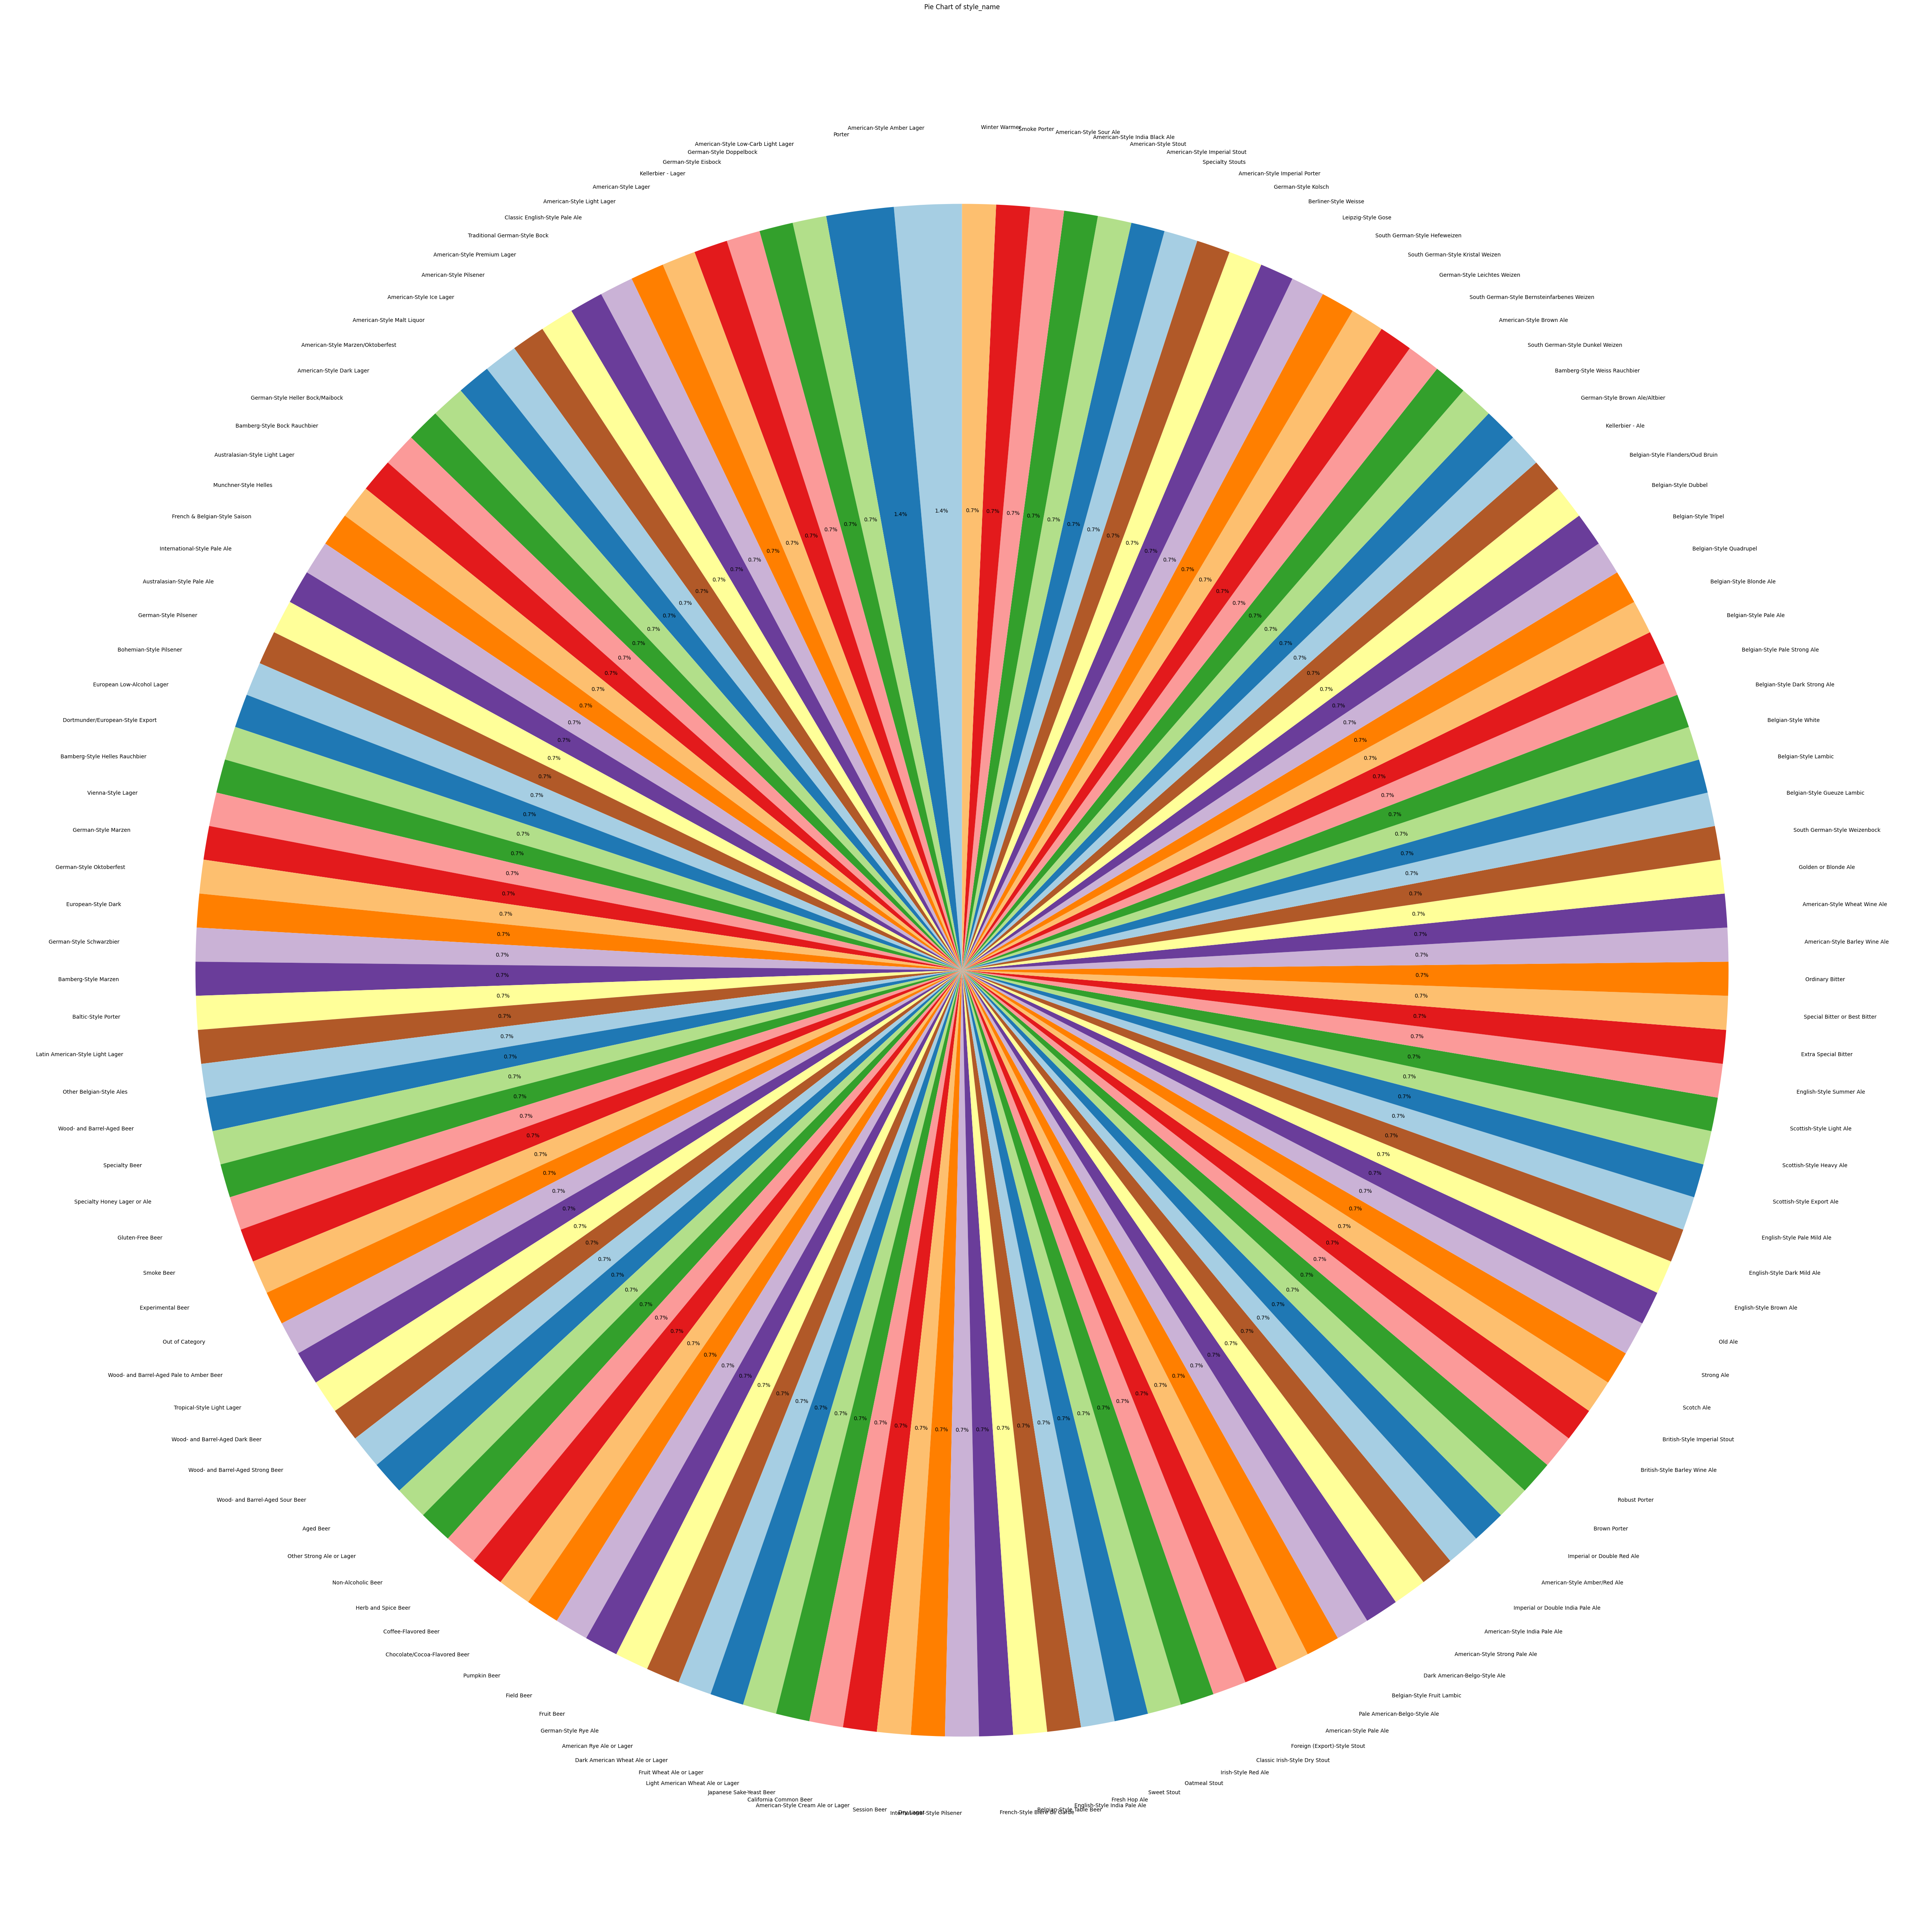

In [8]:
selected_column = 'style_name'

value_counts = styles_df[selected_column].value_counts()

plt.figure(figsize=(139,65))
plt.pie(value_counts, labels=value_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title(f'Pie Chart of style_name')
plt.show

In [9]:
beers_df = pd.read_csv('/kaggle/input/craft-beers/beers.csv')
styles_df = pd.read_csv('/kaggle/input/craft-beers/styles.csv')

merged_df = pd.merge(beers_df, styles_df, left_on='style', right_on='style_name', how='inner')

X = merged_df['style_name']
y = merged_df['style']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_test_tfidf = tfidf_vectorizer.transform(X_test)

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train_tfidf, y_train)

y_pred = model.predict(X_test_tfidf)

print("Classification Report:\n",classification_report(y_test,y_pred))
print("Accuracy Score:", accuracy_score(y_test,y_pred))

all_data_tfidf = tfidf_vectorizer.transform(X)
all_predictions = model.predict(all_data_tfidf)

merged_df['predicted_beer_style'] = all_predictions

#merged_df.to_csv('/kaggle/working/beers_with_predictions.csv')

Classification Report:
                precision    recall  f1-score   support

Oatmeal Stout       1.00      1.00      1.00         2
Winter Warmer       1.00      1.00      1.00         5

     accuracy                           1.00         7
    macro avg       1.00      1.00      1.00         7
 weighted avg       1.00      1.00      1.00         7

Accuracy Score: 1.0
